In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('Churn_Modelling.csv')

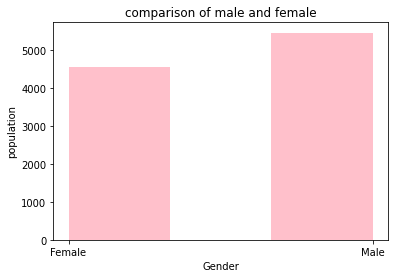

In [2]:
# Plotting the features of the dataset to see the correlation between them

plt.hist(x = df.Gender, bins = 3, color = 'pink')
plt.title('comparison of male and female')
plt.xlabel('Gender')
plt.ylabel('population')
plt.show()

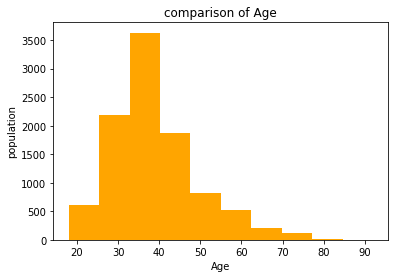

In [3]:
# comparison of age in the dataset

plt.hist(x = df.Age, bins = 10, color = 'orange')
plt.title('comparison of Age')
plt.xlabel('Age')
plt.ylabel('population')
plt.show()

In [4]:
# Removing the unnecassary features from the dataset

df = df.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)
X = df.iloc[:,0:10]
Y = df.iloc[:,10]

In [5]:
X=X.drop(['Geography','Gender'],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [7]:
# Feature Scaling 
# Only on Independent Variable to convert them into values ranging from -1 to +1

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7
0,-0.097921,-0.557598,-1.036351,1.132494,0.810394,0.641985,0.966835,-0.768624
1,-1.126120,0.017259,0.697009,-1.199755,0.810394,0.641985,-1.034302,-1.393599
2,-0.622303,3.562216,0.003665,1.368379,-0.929716,-1.557669,0.966835,-1.497393
3,-1.383170,1.071165,0.003665,-1.199755,-0.929716,-1.557669,0.966835,0.801015
4,-1.465426,2.029262,0.697009,1.085727,-0.929716,0.641985,0.966835,0.512914


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

print("Testing Accuracy :", lr.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Testing Accuracy : 0.8003333333333333
[[2309   70]
 [ 529   92]]


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier() 
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


print("Testing Accuaracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Testing Accuaracy : 0.773
[[2005  374]
 [ 307  314]]
